In [1]:
import os, sys
from pathlib import Path

src_path = Path(os.getcwd()).resolve().parents[1]  
sys.path.append(str(src_path))

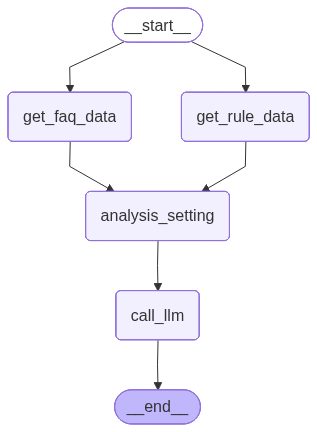

In [2]:
from agents.analysis.housing_faq_agent import housing_faq_graph
housing_faq_graph

In [5]:
invoke = housing_faq_graph.invoke({
    "start_input": {
        "target_area": "서울특별시 강남구 역삼동",
        "main_type":"84타입: 120세대"
    }
})

In [8]:
print(invoke['housing_faq_output'])

# 서울특별시 강남구 역삼동 84타입(120세대) 주택청약 정보 요약

---

## 1. 주택 청약 FAQ 정보

### 1.1. 청약자격 및 세대구성

- **무주택세대구성원**: 청약신청자 및 세대원 전원이 주택을 소유하지 않은 세대의 구성원(세대주 포함)을 의미.  
- **세대원 범위**: 주택공급신청자, 배우자, 직계존속(배우자 포함), 직계비속(배우자 포함), 배우자의 직계비속(동일 주민등록표 등재 시). 형제·자매, 단순 동거인은 세대원에 포함되지 않음.
- **세대분리 및 과거 당첨 이력**: 부모와 세대분리된 자녀는 부모의 과거 당첨 이력에 영향받지 않음.  
- **주택 소유한 직계존속**: 만 60세 이상 직계존속이 주택을 소유한 경우, 민영주택 가점제 산정 시 부양가족에서 제외. 단, 공공임대주택 등은 무주택으로 인정하지 않음.

### 1.2. 청약순위 및 제한

- **1순위 요건(투기과열지구/청약과열지역)**:  
  - 주택청약종합저축 2년 이상 가입, 예치금 충족, 세대주, 5년 이내 당첨 이력 없는 세대, 2주택 이상 소유 세대 제외.
- **재당첨 제한**:  
  - 투기과열지구: 10년  
  - 청약과열지역: 7년  
  - 분양가상한제 적용주택: 10년  
  - 토지임대주택: 5년  
- **당첨자 및 세대원 제한**: 당첨일로부터 5년간 투기과열지구 및 청약과열지역 1순위 청약 제한.

### 1.3. 특별공급 관련

- **특별공급 횟수 제한**: 1세대 1주택 기준, 한 차례만 가능(생애최초, 신혼부부, 신생아 특별공급은 혼인 전 배우자 이력 미적용).
- **특별공급 1순위 요건**: 노부모부양, 생애최초 주택구입자 특별공급은 1순위 자격 필요(5년 이내 무주택세대구성원 전원 당첨 이력 없어야 함).
- **다자녀가구 특별공급**: 미성년 2명 이상 자녀 둔 무주택세대구성원, 10% 범위 내 공급.

### 1.4. 기타

- **청약제한사항 확인**: 한국부동산원 청약홈(www.applyhome.co.kr)

In [9]:
mmd = housing_faq_graph.get_graph().draw_mermaid()
print(mmd)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	get_rule_data(get_rule_data)
	get_faq_data(get_faq_data)
	analysis_setting(analysis_setting)
	call_llm(call_llm)
	__end__([<p>__end__</p>]):::last
	__start__ --> get_faq_data;
	__start__ --> get_rule_data;
	analysis_setting --> call_llm;
	get_faq_data --> analysis_setting;
	get_rule_data --> analysis_setting;
	call_llm --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

